### Evaluation of Clustering Methods 

- How will I evaluate? Doing lots of trials - how many? 

- Which datasets am I using? 

- What extra hybrid or modified approaches do I want to try? 

get cluster centers and assignments of variables to centers 

In [3]:
import numpy as np 

def min_squared_distance(centers: np.ndarray, point: np.ndarray):
    return np.min(np.sum((lambda c: (point - c)**2)(centers), axis=1))

def normalised_k_means_loss(centers: np.ndarray, datapoints: np.ndarray):
    # for each point, calculate the squared distance to all centers
    # take the minimum
    # average over all points 
    return np.mean(np.apply_along_axis(lambda row: min_squared_distance(centers, row), axis=1, arr=datapoints))

centers = np.array([[1,1], [2,2]])
points = np.array([[4, 1], [3,3], [0,1], [0,2]])
normalised_k_means_loss(centers, points)

np.float64(2.5)

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# create synthetic dataset in 2,3,10 dimensions with k=2,3,4,5,10
generator = np.random.default_rng(42)

for dimension in [2,3,10]:
    for num_centers in [2,3,4,5,10]:
        centers = generator.uniform(low=0, high=10, size=(num_centers, dimension))
        dataset = np.concat([generator.multivariate_normal(mean=c, cov=np.identity(dimension), size=100) for c in centers], axis=0)
        # normalise the data to [-1,1]
        scaler = MinMaxScaler((-1,1))
        normalised_dataset = scaler.fit_transform(dataset)
        np.save(f"datasets/d{dimension}{num_centers}.npy", normalised_dataset)

        

[np.float64(0.18586861009731145), np.float64(0.0638284721496563), np.float64(0.08604256997744109), np.float64(0.12535005875259114), np.float64(0.05214476616387404)]


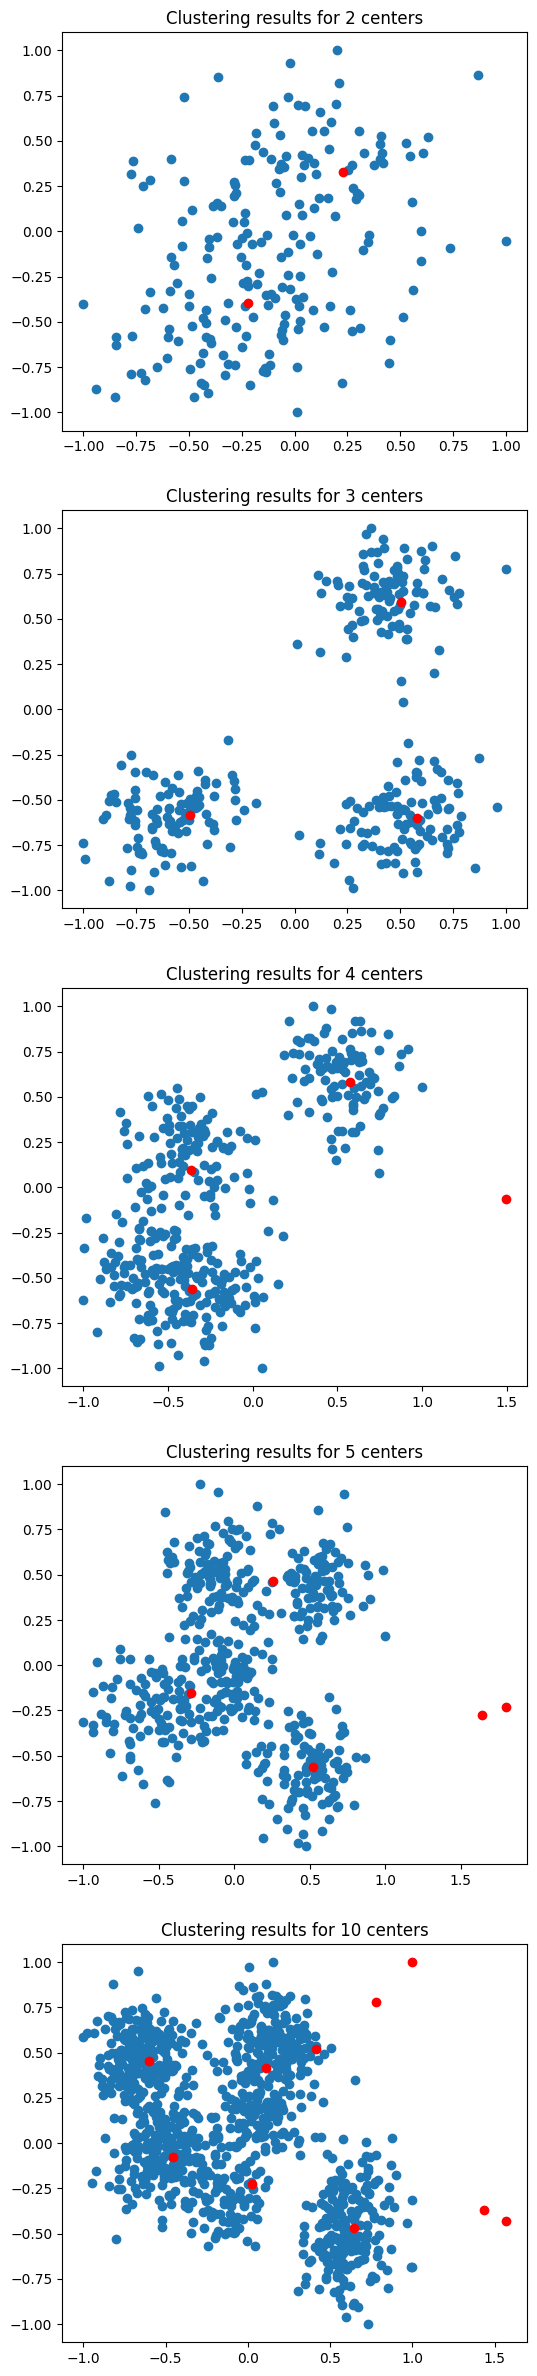

In [21]:
from lloyd import PrivacyBudget, dplloyd
import pandas as pd
import matplotlib.pyplot as plt

priv = PrivacyBudget(5,None,method="uniform",total_iter=5)

fig, axes = plt.subplots(5, 1, figsize=(6, 30))

# 2 dimensions
table=[]
i=0
for num_centers in [2,3,4,5,10]:
    dataset = np.load(f"datasets/d2{num_centers}.npy")
    centers = dplloyd(num_centers, pd.DataFrame(dataset), 5, priv)
    axes[i].scatter(x=dataset[:,0], y=dataset[:, 1])
    axes[i].scatter(x=centers[0], y=centers[1], color="red")
    axes[i].set_title(f"Clustering results for {num_centers} centers")
    table.append(normalised_k_means_loss(centers, dataset))
    i += 1

print(table)